In [91]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [92]:
from config import config
import pandas
import seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import papermill as pm
from stacked_data import xstacked_data
from tqdm import tqdm
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, IsolationForest, RandomForestClassifier, VotingClassifier
from sklearn import metrics

from evaluate import calculate_confusion_matrix_stats, plot_roc_curve, plot_precision_recall, plot_confusion_matrix_ensemble
import xanalyze

In [93]:
description = 'groupedFinal'
split = '341d0e93-c536-4f4b-9178-c70e7b6f9ffd'
fold = 1
hyperparameters = 'xhyperparameters.json'

# Ensemble models

In [94]:
#get the t1, t2, and features models
xanalyze.get_models(split, description, fold, hyperparameters)




{"dropout": 0.5, "optimizer": "sgd-001-0.9-nesterov", "deep-dense-top": false, "convnet-freeze-percent": 0}
"7432a3e9-caed-4743-b60b-71560022569a", # t1
"e2099559-39fa-46ea-9bc3-2aaf0ba4e5b6", # t2
"bbb2feb0-ec36-4574-b6fc-8f5cdafc23eb", # features


In [208]:
MODELS = [    
"4ee95caf-8599-4192-aa2b-b3de0e592d68", # t1
"d4b6d7d4-4404-4083-95a7-84f073570701", # t2
"70586466-be3b-4412-9088-b9d3917425de", # features
]
models = MODELS
print("models: {}".format(models))


models: ['4ee95caf-8599-4192-aa2b-b3de0e592d68', 'd4b6d7d4-4404-4083-95a7-84f073570701', '70586466-be3b-4412-9088-b9d3917425de']


In [209]:
sd = xstacked_data(uuids=models)

  3%|▎         | 22/875 [00:04<02:48,  5.06it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-347
volume              0.556865
outcome            malignant
age                 0.528736
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-347, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-347-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

  3%|▎         | 28/875 [00:05<02:01,  6.96it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-290
volume              0.554165
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-290, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-290-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

  8%|▊         | 71/875 [00:14<03:08,  4.26it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-336
volume              0.555446
outcome            malignant
age                 0.735632
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-336, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-336-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 11%|█         | 97/875 [00:20<03:44,  3.47it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-315
volume              0.554134
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-315, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-315-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 15%|█▍        | 127/875 [00:26<02:08,  5.83it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-289
volume               0.55411
outcome            malignant
age                 0.586207
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-289, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-289-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 15%|█▍        | 129/875 [00:27<03:50,  3.23it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-335
volume              0.554109
outcome            malignant
age                 0.586207
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-335, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-335-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 16%|█▋        | 143/875 [00:30<02:54,  4.21it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-318
volume              0.554239
outcome            malignant
age                 0.298851
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-318, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-318-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 19%|█▉        | 169/875 [00:38<03:51,  3.05it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-313
volume               0.55412
outcome            malignant
age                 0.632184
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-313, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-313-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 22%|██▏       | 189/875 [00:42<02:15,  5.06it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-371
volume              0.554151
outcome            malignant
age                 0.333333
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-371, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-371-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 24%|██▍       | 209/875 [00:47<01:44,  6.39it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-337
volume              0.554799
outcome            malignant
age                  0.54023
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-337, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-337-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 27%|██▋       | 233/875 [00:51<01:22,  7.76it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-375
volume              0.554126
outcome            malignant
age                 0.758621
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-375, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-375-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 27%|██▋       | 240/875 [00:53<01:34,  6.75it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-284
volume              0.554126
outcome            malignant
age                 0.574713
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-284, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-284-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 28%|██▊       | 246/875 [00:54<03:04,  3.42it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-317
volume              0.554394
outcome            malignant
age                 0.482759
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-317, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-317-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 29%|██▊       | 250/875 [00:56<04:57,  2.10it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-306
volume              0.554187
outcome            malignant
age                  0.62069
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-306, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-306-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 33%|███▎      | 287/875 [01:03<02:37,  3.74it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-311
volume              0.554153
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-311, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-311-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 35%|███▍      | 302/875 [01:08<02:59,  3.20it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-348
volume              0.554294
outcome            malignant
age                 0.528736
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-348, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-348-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 38%|███▊      | 330/875 [01:13<02:22,  3.82it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-344
volume                0.5557
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-344, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-344-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 40%|███▉      | 346/875 [01:16<01:22,  6.43it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-332
volume              0.554126
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-332, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-332-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 40%|████      | 350/875 [01:16<01:10,  7.41it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-293
volume              0.554127
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-293, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-293-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 41%|████      | 355/875 [01:17<01:00,  8.56it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-316
volume              0.554112
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-316, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-316-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 42%|████▏     | 367/875 [01:18<01:04,  7.84it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-307
volume              0.554109
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-307, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-307-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 42%|████▏     | 371/875 [01:19<01:46,  4.75it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-338
volume              0.554257
outcome            malignant
age                 0.402299
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-338, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-338-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 46%|████▌     | 399/875 [01:25<01:04,  7.39it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-321
volume              0.554111
outcome            malignant
age                 0.609195
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-321, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-321-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 47%|████▋     | 415/875 [01:28<02:20,  3.27it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-328
volume              0.554306
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-328, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-328-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 49%|████▉     | 432/875 [01:33<01:51,  3.97it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-327
volume               0.55482
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-327, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-327-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 58%|█████▊    | 510/875 [01:52<01:00,  6.07it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-333
volume              0.554346
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-333, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-333-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 61%|██████    | 531/875 [01:55<00:47,  7.23it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-308
volume              0.559706
outcome            malignant
age                 0.643678
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-308, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-308-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 63%|██████▎   | 550/875 [02:00<01:25,  3.80it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-339
volume              0.554238
outcome            malignant
age                 0.402299
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-339, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-339-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 64%|██████▍   | 559/875 [02:01<00:54,  5.83it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-323
volume               0.55412
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-323, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-323-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 69%|██████▉   | 608/875 [02:13<01:52,  2.38it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-341
volume              0.554298
outcome            malignant
age                 0.735632
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-341, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-341-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 70%|██████▉   | 612/875 [02:14<01:09,  3.80it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-299
volume              0.554318
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-299, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-299-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 72%|███████▏  | 627/875 [02:17<00:44,  5.57it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-325
volume              0.554334
outcome            malignant
age                 0.712644
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-325, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-325-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 73%|███████▎  | 635/875 [02:18<00:40,  5.93it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-287
volume              0.554123
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-287, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-287-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 73%|███████▎  | 638/875 [02:19<00:36,  6.51it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-342
volume              0.555365
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-342, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-342-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 75%|███████▍  | 656/875 [02:23<00:50,  4.37it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-286
volume              0.554285
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-286, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-286-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 81%|████████  | 709/875 [02:35<00:34,  4.77it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-357
volume              0.554162
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-357, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-357-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 82%|████████▏ | 718/875 [02:36<00:27,  5.76it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-292
volume              0.557101
outcome            malignant
age                 0.632184
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-292, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-292-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 87%|████████▋ | 757/875 [02:47<00:30,  3.82it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-374
volume              0.554309
outcome            malignant
age                 0.494253
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-374, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-374-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 88%|████████▊ | 766/875 [02:48<00:22,  4.82it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-167
volume              0.554741
outcome            malignant
age                 0.563218
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-167, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-167-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 89%|████████▊ | 776/875 [02:49<00:14,  6.94it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-370
volume              0.554196
outcome            malignant
age                 0.655172
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-370, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-370-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 89%|████████▉ | 777/875 [02:49<00:13,  7.32it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-295
volume               0.55412
outcome            malignant
age                 0.701149
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-295, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-295-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 90%|█████████ | 790/875 [02:51<00:14,  5.85it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-298
volume              0.554443
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-298, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-298-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 91%|█████████ | 797/875 [02:52<00:11,  6.62it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-300
volume              0.554311
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-300, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-300-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 91%|█████████▏| 799/875 [02:53<00:10,  7.28it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-314
volume              0.554121
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-314, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-314-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 93%|█████████▎| 818/875 [02:57<00:14,  3.90it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-288
volume              0.554152
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-288, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-288-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 22%|██▏       | 33/147 [00:08<00:26,  4.36it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-312
volume              0.554324
outcome            malignant
age                 0.724138
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-312, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-312-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 35%|███▍      | 51/147 [00:13<00:47,  2.02it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-322
volume               0.55417
outcome            malignant
age                  0.62069
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-322, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-322-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 39%|███▉      | 58/147 [00:15<00:26,  3.36it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-285
volume              0.554138
outcome            malignant
age                 0.494253
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-285, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-285-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 44%|████▍     | 65/147 [00:16<00:13,  6.00it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-330
volume              0.554112
outcome            malignant
age                 0.471264
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-330, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-330-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 50%|████▉     | 73/147 [00:18<00:19,  3.77it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-324
volume              0.556762
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-324, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-324-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 52%|█████▏    | 76/147 [00:18<00:16,  4.43it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-320
volume              0.554113
outcome            malignant
age                 0.505747
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-320, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-320-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 57%|█████▋    | 84/147 [00:19<00:14,  4.21it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-369
volume               0.55412
outcome            malignant
age                 0.643678
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-369, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-369-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 69%|██████▉   | 102/147 [00:24<00:10,  4.15it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-329
volume              0.554149
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-329, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-329-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 99%|█████████▊| 145/147 [00:34<00:00,  4.65it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-376
volume              0.554298
outcome            malignant
age                 0.724138
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-376, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-376-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 19%|█▊        | 27/145 [00:06<00:23,  5.04it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-334
volume              0.554118
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-334, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-334-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 31%|███       | 45/145 [00:10<00:32,  3.06it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-303
volume               0.55418
outcome            malignant
age                 0.609195
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-303, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-303-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 46%|████▌     | 66/145 [00:13<00:15,  4.99it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-283
volume              0.554108
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-283, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-283-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 52%|█████▏    | 75/145 [00:14<00:09,  7.10it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-345
volume              0.554146
outcome            malignant
age                 0.482759
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-345, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-345-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 57%|█████▋    | 82/145 [00:15<00:08,  7.26it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-331
volume              0.556562
outcome            malignant
age                 0.574713
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-331, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-331-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 71%|███████   | 103/145 [00:21<00:17,  2.36it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-297
volume              0.554118
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-297, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-297-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 84%|████████▍ | 122/145 [00:24<00:03,  6.15it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-310
volume              0.558272
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-310, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-310-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 92%|█████████▏| 134/145 [00:27<00:02,  3.76it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-291
volume               0.55414
outcome            malignant
age                 0.816092
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-291, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-291-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

  3%|▎         | 22/875 [00:04<02:49,  5.04it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-347
volume              0.556865
outcome            malignant
age                 0.528736
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-347, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-347-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

  3%|▎         | 28/875 [00:05<02:02,  6.90it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-290
volume              0.554165
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-290, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-290-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

  8%|▊         | 71/875 [00:14<03:07,  4.29it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-336
volume              0.555446
outcome            malignant
age                 0.735632
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-336, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-336-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 11%|█         | 97/875 [00:20<03:48,  3.40it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-315
volume              0.554134
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-315, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-315-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 15%|█▍        | 127/875 [00:26<02:09,  5.77it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-289
volume               0.55411
outcome            malignant
age                 0.586207
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-289, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-289-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 15%|█▍        | 129/875 [00:27<03:51,  3.22it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-335
volume              0.554109
outcome            malignant
age                 0.586207
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-335, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-335-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 16%|█▋        | 143/875 [00:30<03:12,  3.79it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-318
volume              0.554239
outcome            malignant
age                 0.298851
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-318, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-318-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 19%|█▉        | 169/875 [00:38<03:49,  3.08it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-313
volume               0.55412
outcome            malignant
age                 0.632184
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-313, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-313-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 22%|██▏       | 189/875 [00:43<02:14,  5.09it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-371
volume              0.554151
outcome            malignant
age                 0.333333
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-371, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-371-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 24%|██▍       | 209/875 [00:48<01:43,  6.41it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-337
volume              0.554799
outcome            malignant
age                  0.54023
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-337, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-337-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 27%|██▋       | 233/875 [00:52<01:23,  7.72it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-375
volume              0.554126
outcome            malignant
age                 0.758621
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-375, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-375-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 27%|██▋       | 240/875 [00:53<01:34,  6.73it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-284
volume              0.554126
outcome            malignant
age                 0.574713
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-284, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-284-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 28%|██▊       | 246/875 [00:54<03:04,  3.40it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-317
volume              0.554394
outcome            malignant
age                 0.482759
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-317, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-317-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 29%|██▊       | 250/875 [00:56<04:43,  2.20it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-306
volume              0.554187
outcome            malignant
age                  0.62069
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-306, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-306-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 33%|███▎      | 287/875 [01:04<02:37,  3.73it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-311
volume              0.554153
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-311, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-311-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 35%|███▍      | 302/875 [01:08<03:01,  3.17it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-348
volume              0.554294
outcome            malignant
age                 0.528736
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-348, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-348-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 38%|███▊      | 330/875 [01:13<02:22,  3.84it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-344
volume                0.5557
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-344, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-344-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 40%|███▉      | 346/875 [01:16<01:23,  6.36it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-332
volume              0.554126
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-332, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-332-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 40%|████      | 350/875 [01:16<01:11,  7.36it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-293
volume              0.554127
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-293, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-293-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 41%|████      | 355/875 [01:17<01:01,  8.50it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-316
volume              0.554112
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-316, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-316-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 42%|████▏     | 367/875 [01:18<01:05,  7.81it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-307
volume              0.554109
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-307, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-307-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 42%|████▏     | 371/875 [01:19<01:46,  4.73it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-338
volume              0.554257
outcome            malignant
age                 0.402299
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-338, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-338-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 46%|████▌     | 399/875 [01:25<01:04,  7.43it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-321
volume              0.554111
outcome            malignant
age                 0.609195
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-321, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-321-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 47%|████▋     | 415/875 [01:28<02:23,  3.20it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-328
volume              0.554306
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-328, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-328-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 49%|████▉     | 432/875 [01:33<01:49,  4.03it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-327
volume               0.55482
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-327, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-327-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 58%|█████▊    | 510/875 [01:53<01:00,  6.04it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-333
volume              0.554346
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-333, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-333-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 61%|██████    | 531/875 [01:56<00:47,  7.28it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-308
volume              0.559706
outcome            malignant
age                 0.643678
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-308, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-308-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 63%|██████▎   | 550/875 [02:00<01:27,  3.72it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-339
volume              0.554238
outcome            malignant
age                 0.402299
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-339, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-339-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 64%|██████▍   | 559/875 [02:02<00:54,  5.82it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-323
volume               0.55412
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-323, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-323-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 69%|██████▉   | 608/875 [02:14<01:52,  2.38it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-341
volume              0.554298
outcome            malignant
age                 0.735632
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-341, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-341-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 70%|██████▉   | 612/875 [02:14<01:09,  3.77it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-299
volume              0.554318
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-299, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-299-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 72%|███████▏  | 627/875 [02:17<00:44,  5.60it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-325
volume              0.554334
outcome            malignant
age                 0.712644
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-325, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-325-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 73%|███████▎  | 635/875 [02:19<00:40,  5.87it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-287
volume              0.554123
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-287, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-287-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 73%|███████▎  | 638/875 [02:19<00:36,  6.42it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-342
volume              0.555365
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-342, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-342-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 75%|███████▍  | 656/875 [02:23<00:50,  4.37it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-286
volume              0.554285
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-286, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-286-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 81%|████████  | 709/875 [02:36<00:35,  4.67it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-357
volume              0.554162
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-357, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-357-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 82%|████████▏ | 718/875 [02:37<00:27,  5.72it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-292
volume              0.557101
outcome            malignant
age                 0.632184
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-292, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-292-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 87%|████████▋ | 757/875 [02:47<00:31,  3.75it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-374
volume              0.554309
outcome            malignant
age                 0.494253
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-374, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-374-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 88%|████████▊ | 766/875 [02:49<00:23,  4.73it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-167
volume              0.554741
outcome            malignant
age                 0.563218
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-167, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-167-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 89%|████████▊ | 776/875 [02:50<00:14,  6.80it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-370
volume              0.554196
outcome            malignant
age                 0.655172
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-370, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-370-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 89%|████████▉ | 777/875 [02:50<00:13,  7.20it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-295
volume               0.55412
outcome            malignant
age                 0.701149
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-295, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-295-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 90%|█████████ | 790/875 [02:52<00:14,  5.87it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-298
volume              0.554443
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-298, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-298-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 91%|█████████ | 797/875 [02:53<00:11,  6.70it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-300
volume              0.554311
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-300, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-300-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 91%|█████████▏| 799/875 [02:53<00:10,  7.34it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-314
volume              0.554121
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-314, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-314-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 93%|█████████▎| 818/875 [02:57<00:15,  3.57it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-288
volume              0.554152
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-288, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-288-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 22%|██▏       | 33/147 [00:08<00:25,  4.40it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-312
volume              0.554324
outcome            malignant
age                 0.724138
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-312, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-312-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 35%|███▍      | 51/147 [00:13<00:47,  2.03it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-322
volume               0.55417
outcome            malignant
age                  0.62069
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-322, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-322-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 39%|███▉      | 58/147 [00:15<00:26,  3.37it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-285
volume              0.554138
outcome            malignant
age                 0.494253
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-285, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-285-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 44%|████▍     | 65/147 [00:16<00:13,  6.01it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-330
volume              0.554112
outcome            malignant
age                 0.471264
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-330, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-330-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 50%|████▉     | 73/147 [00:18<00:19,  3.84it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-324
volume              0.556762
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-324, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-324-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 52%|█████▏    | 76/147 [00:18<00:15,  4.50it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-320
volume              0.554113
outcome            malignant
age                 0.505747
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-320, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-320-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 57%|█████▋    | 84/147 [00:19<00:14,  4.22it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-369
volume               0.55412
outcome            malignant
age                 0.643678
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-369, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-369-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 69%|██████▉   | 102/147 [00:24<00:10,  4.18it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-329
volume              0.554149
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-329, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-329-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 99%|█████████▊| 145/147 [00:34<00:00,  4.65it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-376
volume              0.554298
outcome            malignant
age                 0.724138
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-376, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-376-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 19%|█▊        | 27/145 [00:05<00:22,  5.29it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-334
volume              0.554118
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-334, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-334-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 31%|███       | 45/145 [00:10<00:32,  3.08it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-303
volume               0.55418
outcome            malignant
age                 0.609195
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-303, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-303-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 46%|████▌     | 66/145 [00:13<00:15,  4.99it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-283
volume              0.554108
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-283, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-283-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 52%|█████▏    | 75/145 [00:14<00:09,  7.19it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-345
volume              0.554146
outcome            malignant
age                 0.482759
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-345, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-345-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 57%|█████▋    | 82/145 [00:15<00:08,  7.27it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-331
volume              0.556562
outcome            malignant
age                 0.574713
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-331, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-331-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 71%|███████   | 103/145 [00:20<00:17,  2.35it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-297
volume              0.554118
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-297, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-297-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 84%|████████▍ | 122/145 [00:24<00:03,  6.21it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-310
volume              0.558272
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-310, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-310-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 94%|█████████▍| 136/145 [00:26<00:01,  5.10it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-291
volume               0.55414
outcome            malignant
age                 0.816092
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-291, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-291-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

  3%|▎         | 22/875 [00:02<01:34,  9.07it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-347
volume              0.556865
outcome            malignant
age                 0.528736
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-347, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-347-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

  3%|▎         | 28/875 [00:02<01:28,  9.56it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-290
volume              0.554165
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-290, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-290-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

  8%|▊         | 73/875 [00:07<01:10, 11.43it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-336
volume              0.555446
outcome            malignant
age                 0.735632
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-336, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-336-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 11%|█▏        | 99/875 [00:11<01:57,  6.60it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-315
volume              0.554134
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-315, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-315-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 14%|█▍        | 124/875 [00:13<01:23,  8.97it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-289
volume               0.55411
outcome            malignant
age                 0.586207
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-289, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-289-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 15%|█▌        | 132/875 [00:14<01:05, 11.33it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-335
volume              0.554109
outcome            malignant
age                 0.586207
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-335, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-335-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 16%|█▋        | 143/875 [00:15<00:59, 12.30it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-318
volume              0.554239
outcome            malignant
age                 0.298851
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-318, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-318-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 19%|█▉        | 169/875 [00:18<01:58,  5.97it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-313
volume               0.55412
outcome            malignant
age                 0.632184
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-313, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-313-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 22%|██▏       | 189/875 [00:20<01:04, 10.60it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-371
volume              0.554151
outcome            malignant
age                 0.333333
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-371, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-371-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 24%|██▎       | 206/875 [00:22<01:01, 10.92it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-337
volume              0.554799
outcome            malignant
age                  0.54023
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-337, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-337-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 27%|██▋       | 233/875 [00:24<00:52, 12.33it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-375
volume              0.554126
outcome            malignant
age                 0.758621
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-375, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-375-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 27%|██▋       | 240/875 [00:25<00:57, 11.07it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-284
volume              0.554126
outcome            malignant
age                 0.574713
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-284, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-284-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 28%|██▊       | 247/875 [00:26<01:00, 10.32it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-317
volume              0.554394
outcome            malignant
age                 0.482759
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-317, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-317-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 29%|██▉       | 253/875 [00:26<00:52, 11.95it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-306
volume              0.554187
outcome            malignant
age                  0.62069
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-306, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-306-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 32%|███▏      | 284/875 [00:29<01:21,  7.23it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-311
volume              0.554153
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-311, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-311-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 35%|███▌      | 309/875 [00:31<00:39, 14.25it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-348
volume              0.554294
outcome            malignant
age                 0.528736
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-348, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-348-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 38%|███▊      | 331/875 [00:34<00:51, 10.63it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-344
volume                0.5557
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-344, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-344-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 40%|███▉      | 348/875 [00:35<00:35, 14.90it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-332
volume              0.554126
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-332, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-332-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 40%|████      | 350/875 [00:35<00:42, 12.30it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-293
volume              0.554127
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-293, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-293-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 41%|████      | 357/875 [00:36<00:37, 13.78it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-316
volume              0.554112
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-316, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-316-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 42%|████▏     | 368/875 [00:37<00:47, 10.70it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-307
volume              0.554109
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-307, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-307-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 42%|████▏     | 370/875 [00:37<01:03,  8.01it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-338
volume              0.554257
outcome            malignant
age                 0.402299
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-338, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-338-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 46%|████▌     | 401/875 [00:40<00:34, 13.55it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-321
volume              0.554111
outcome            malignant
age                 0.609195
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-321, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-321-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 48%|████▊     | 417/875 [00:41<00:38, 11.90it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-328
volume              0.554306
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-328, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-328-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 49%|████▉     | 432/875 [00:42<00:37, 11.86it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-327
volume               0.55482
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-327, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-327-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 58%|█████▊    | 508/875 [00:51<00:35, 10.24it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-333
volume              0.554346
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-333, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-333-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 61%|██████    | 531/875 [00:52<00:26, 12.93it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-308
volume              0.559706
outcome            malignant
age                 0.643678
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-308, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-308-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 63%|██████▎   | 547/875 [00:55<00:55,  5.95it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-339
volume              0.554238
outcome            malignant
age                 0.402299
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-339, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-339-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 63%|██████▎   | 554/875 [00:55<00:37,  8.50it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-340
volume              0.554814
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-340, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-340-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 64%|██████▍   | 559/875 [00:56<00:26, 11.72it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-323
volume               0.55412
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-323, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-323-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 70%|██████▉   | 610/875 [01:01<00:20, 13.14it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-341
volume              0.554298
outcome            malignant
age                 0.735632
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-341, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-341-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 72%|███████▏  | 626/875 [01:02<00:17, 14.02it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-325
volume              0.554334
outcome            malignant
age                 0.712644
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-325, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-325-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 73%|███████▎  | 638/875 [01:03<00:25,  9.23it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-287
volume              0.554123
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-287, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-287-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 75%|███████▍  | 656/875 [01:04<00:11, 18.79it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-286
volume              0.554285
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-286, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-286-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 81%|████████▏ | 711/875 [01:10<00:20,  8.18it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-357
volume              0.554162
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-357, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-357-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 82%|████████▏ | 720/875 [01:11<00:16,  9.12it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-292
volume              0.557101
outcome            malignant
age                 0.632184
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-292, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-292-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 87%|████████▋ | 761/875 [01:15<00:08, 13.07it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-374
volume              0.554309
outcome            malignant
age                 0.494253
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-374, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-374-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 88%|████████▊ | 768/875 [01:16<00:06, 15.72it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-167
volume              0.554741
outcome            malignant
age                 0.563218
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-167, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-167-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 89%|████████▉ | 777/875 [01:17<00:09,  9.88it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-370
volume              0.554196
outcome            malignant
age                 0.655172
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-370, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-370-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 90%|█████████ | 791/875 [01:18<00:05, 14.50it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-298
volume              0.554443
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-298, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-298-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 91%|█████████ | 797/875 [01:18<00:04, 16.46it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-300
volume              0.554311
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-300, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-300-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 92%|█████████▏| 803/875 [01:18<00:03, 18.41it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-314
volume              0.554121
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-314, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-314-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 94%|█████████▎| 819/875 [01:20<00:05, 10.66it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-288
volume              0.554152
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-288, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-288-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 26%|██▌       | 38/147 [00:03<00:06, 17.75it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-312
volume              0.554324
outcome            malignant
age                 0.724138
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-312, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-312-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 35%|███▍      | 51/147 [00:04<00:12,  7.77it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-322
volume               0.55417
outcome            malignant
age                  0.62069
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-322, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-322-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 40%|████      | 59/147 [00:05<00:09,  8.86it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-285
volume              0.554138
outcome            malignant
age                 0.494253
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-285, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-285-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 44%|████▎     | 64/147 [00:06<00:11,  7.47it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-330
volume              0.554112
outcome            malignant
age                 0.471264
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-330, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-330-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 53%|█████▎    | 78/147 [00:08<00:06, 10.88it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-324
volume              0.556762
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-324, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-324-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 57%|█████▋    | 84/147 [00:08<00:04, 14.60it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-369
volume               0.55412
outcome            malignant
age                 0.643678
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-369, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-369-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 69%|██████▉   | 102/147 [00:10<00:04,  9.26it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-329
volume              0.554149
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-329, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-329-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

  1%|          | 1/145 [00:00<00:21,  6.84it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-376
volume              0.554298
outcome            malignant
age                 0.724138
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-376, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-376-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 19%|█▊        | 27/145 [00:03<00:10, 10.95it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-334
volume              0.554118
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-334, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-334-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 31%|███       | 45/145 [00:04<00:09, 10.51it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-303
volume               0.55418
outcome            malignant
age                 0.609195
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-303, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-303-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 43%|████▎     | 63/145 [00:06<00:08,  9.94it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-283
volume              0.554108
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-283, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-283-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 51%|█████     | 74/145 [00:07<00:05, 13.97it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-345
volume              0.554146
outcome            malignant
age                 0.482759
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-345, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-345-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 59%|█████▉    | 86/145 [00:08<00:05, 10.69it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-331
volume              0.556562
outcome            malignant
age                 0.574713
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-331, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-331-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 71%|███████   | 103/145 [00:10<00:04,  9.01it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-297
volume              0.554118
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-297, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-297-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 86%|████████▌ | 124/145 [00:12<00:02,  9.21it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-310
volume              0.558272
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-310, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-310-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 94%|█████████▍| 136/145 [00:13<00:00, 10.73it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-291
volume               0.55414
outcome            malignant
age                 0.816092
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-291, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-291-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

  3%|▎         | 22/875 [00:02<01:38,  8.63it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-347
volume              0.556865
outcome            malignant
age                 0.528736
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-347, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-347-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

  3%|▎         | 28/875 [00:03<01:29,  9.48it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-290
volume              0.554165
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-290, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-290-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

  8%|▊         | 73/875 [00:07<01:10, 11.33it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-336
volume              0.555446
outcome            malignant
age                 0.735632
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-336, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-336-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 11%|█▏        | 99/875 [00:11<01:53,  6.81it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-315
volume              0.554134
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-315, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-315-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 14%|█▍        | 124/875 [00:13<01:22,  9.05it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-289
volume               0.55411
outcome            malignant
age                 0.586207
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-289, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-289-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 15%|█▌        | 132/875 [00:14<01:04, 11.47it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-335
volume              0.554109
outcome            malignant
age                 0.586207
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-335, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-335-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 16%|█▋        | 144/875 [00:15<00:55, 13.15it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-318
volume              0.554239
outcome            malignant
age                 0.298851
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-318, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-318-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 19%|█▉        | 169/875 [00:18<01:58,  5.93it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-313
volume               0.55412
outcome            malignant
age                 0.632184
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-313, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-313-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 22%|██▏       | 189/875 [00:20<01:07, 10.15it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-371
volume              0.554151
outcome            malignant
age                 0.333333
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-371, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-371-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 24%|██▎       | 206/875 [00:22<01:00, 10.98it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-337
volume              0.554799
outcome            malignant
age                  0.54023
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-337, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-337-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 27%|██▋       | 233/875 [00:24<00:52, 12.28it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-375
volume              0.554126
outcome            malignant
age                 0.758621
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-375, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-375-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 27%|██▋       | 240/875 [00:25<00:56, 11.15it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-284
volume              0.554126
outcome            malignant
age                 0.574713
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-284, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-284-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 28%|██▊       | 247/875 [00:26<00:59, 10.51it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-317
volume              0.554394
outcome            malignant
age                 0.482759
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-317, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-317-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 29%|██▉       | 253/875 [00:26<00:51, 12.03it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-306
volume              0.554187
outcome            malignant
age                  0.62069
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-306, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-306-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 32%|███▏      | 284/875 [00:29<01:25,  6.94it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-311
volume              0.554153
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-311, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-311-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 35%|███▌      | 309/875 [00:31<00:39, 14.18it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-348
volume              0.554294
outcome            malignant
age                 0.528736
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-348, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-348-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 38%|███▊      | 331/875 [00:34<00:50, 10.81it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-344
volume                0.5557
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-344, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-344-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 40%|███▉      | 348/875 [00:35<00:33, 15.52it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-332
volume              0.554126
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-332, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-332-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 40%|████      | 351/875 [00:35<00:35, 14.85it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-293
volume              0.554127
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-293, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-293-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 41%|████      | 357/875 [00:36<00:38, 13.53it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-316
volume              0.554112
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-316, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-316-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 42%|████▏     | 368/875 [00:37<00:47, 10.69it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-307
volume              0.554109
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-307, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-307-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 42%|████▏     | 370/875 [00:37<01:02,  8.09it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-338
volume              0.554257
outcome            malignant
age                 0.402299
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-338, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-338-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 46%|████▌     | 401/875 [00:40<00:35, 13.53it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-321
volume              0.554111
outcome            malignant
age                 0.609195
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-321, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-321-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 48%|████▊     | 417/875 [00:41<00:38, 11.77it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-328
volume              0.554306
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-328, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-328-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 49%|████▉     | 432/875 [00:42<00:36, 11.99it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-327
volume               0.55482
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-327, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-327-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 58%|█████▊    | 508/875 [00:51<00:35, 10.22it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-333
volume              0.554346
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-333, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-333-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 61%|██████    | 531/875 [00:53<00:26, 12.97it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-308
volume              0.559706
outcome            malignant
age                 0.643678
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-308, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-308-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 63%|██████▎   | 547/875 [00:55<00:51,  6.33it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-339
volume              0.554238
outcome            malignant
age                 0.402299
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-339, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-339-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 63%|██████▎   | 554/875 [00:55<00:36,  8.91it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-340
volume              0.554814
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-340, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-340-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 64%|██████▍   | 558/875 [00:56<00:27, 11.61it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-323
volume               0.55412
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-323, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-323-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 70%|██████▉   | 610/875 [01:01<00:20, 13.09it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-341
volume              0.554298
outcome            malignant
age                 0.735632
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-341, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-341-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 72%|███████▏  | 626/875 [01:02<00:17, 14.00it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-325
volume              0.554334
outcome            malignant
age                 0.712644
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-325, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-325-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 73%|███████▎  | 638/875 [01:04<00:24,  9.64it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-287
volume              0.554123
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-287, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-287-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 75%|███████▍  | 656/875 [01:05<00:11, 18.96it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-286
volume              0.554285
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-286, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-286-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 81%|████████  | 709/875 [01:10<00:23,  7.08it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-357
volume              0.554162
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-357, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-357-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 82%|████████▏ | 721/875 [01:11<00:16,  9.58it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-292
volume              0.557101
outcome            malignant
age                 0.632184
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-292, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-292-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 87%|████████▋ | 761/875 [01:16<00:08, 13.32it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-374
volume              0.554309
outcome            malignant
age                 0.494253
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-374, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-374-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 88%|████████▊ | 768/875 [01:16<00:06, 15.47it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-167
volume              0.554741
outcome            malignant
age                 0.563218
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-167, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-167-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 89%|████████▉ | 779/875 [01:17<00:08, 11.96it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-370
volume              0.554196
outcome            malignant
age                 0.655172
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-370, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-370-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 90%|█████████ | 791/875 [01:18<00:05, 14.39it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-298
volume              0.554443
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-298, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-298-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 91%|█████████ | 797/875 [01:18<00:04, 16.50it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-300
volume              0.554311
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-300, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-300-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 92%|█████████▏| 803/875 [01:18<00:03, 19.12it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-314
volume              0.554121
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-314, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-314-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 94%|█████████▎| 819/875 [01:20<00:05, 10.43it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-288
volume              0.554152
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-288, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-288-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 26%|██▌       | 38/147 [00:03<00:06, 17.33it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-312
volume              0.554324
outcome            malignant
age                 0.724138
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-312, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-312-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 35%|███▍      | 51/147 [00:04<00:12,  7.78it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-322
volume               0.55417
outcome            malignant
age                  0.62069
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-322, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-322-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 40%|████      | 59/147 [00:05<00:09,  8.91it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-285
volume              0.554138
outcome            malignant
age                 0.494253
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-285, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-285-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 44%|████▎     | 64/147 [00:06<00:11,  7.51it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-330
volume              0.554112
outcome            malignant
age                 0.471264
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-330, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-330-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 53%|█████▎    | 78/147 [00:08<00:06, 10.71it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-324
volume              0.556762
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-324, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-324-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 57%|█████▋    | 84/147 [00:08<00:04, 14.02it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-369
volume               0.55412
outcome            malignant
age                 0.643678
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-369, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-369-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 69%|██████▉   | 102/147 [00:10<00:04,  9.06it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-329
volume              0.554149
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-329, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-329-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

  1%|          | 1/145 [00:00<00:21,  6.73it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-376
volume              0.554298
outcome            malignant
age                 0.724138
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-376, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-376-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 19%|█▊        | 27/145 [00:03<00:11, 10.46it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-334
volume              0.554118
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-334, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-334-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 31%|███       | 45/145 [00:05<00:09, 10.05it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-303
volume               0.55418
outcome            malignant
age                 0.609195
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-303, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-303-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 43%|████▎     | 63/145 [00:06<00:08,  9.36it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-283
volume              0.554108
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-283, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-283-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 51%|█████     | 74/145 [00:07<00:05, 13.12it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-345
volume              0.554146
outcome            malignant
age                 0.482759
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-345, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-345-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 59%|█████▉    | 86/145 [00:08<00:05, 10.63it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-331
volume              0.556562
outcome            malignant
age                 0.574713
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-331, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-331-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 71%|███████   | 103/145 [00:10<00:05,  8.15it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-297
volume              0.554118
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-297, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-297-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 86%|████████▌ | 125/145 [00:13<00:01, 10.83it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-310
volume              0.558272
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-310, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-310-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

 94%|█████████▍| 136/145 [00:14<00:00, 11.09it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-291
volume               0.55414
outcome            malignant
age                 0.816092
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-291, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-291-T2WI-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 283, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 

  3%|▎         | 22/875 [00:04<02:44,  5.18it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-347
volume              0.556865
outcome            malignant
age                 0.528736
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-347, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-347-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

  3%|▎         | 28/875 [00:05<01:58,  7.14it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-290
volume              0.554165
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-290, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-290-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

  8%|▊         | 71/875 [00:14<03:07,  4.30it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-336
volume              0.555446
outcome            malignant
age                 0.735632
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-336, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-336-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 11%|█         | 97/875 [00:20<03:38,  3.56it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-315
volume              0.554134
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-315, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-315-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 15%|█▍        | 127/875 [00:26<02:09,  5.77it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-289
volume               0.55411
outcome            malignant
age                 0.586207
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-289, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-289-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 15%|█▍        | 129/875 [00:27<03:49,  3.25it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-335
volume              0.554109
outcome            malignant
age                 0.586207
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-335, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-335-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 16%|█▋        | 143/875 [00:29<02:52,  4.25it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-318
volume              0.554239
outcome            malignant
age                 0.298851
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-318, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-318-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 19%|█▉        | 169/875 [00:37<03:57,  2.98it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-313
volume               0.55412
outcome            malignant
age                 0.632184
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-313, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-313-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 22%|██▏       | 189/875 [00:43<02:21,  4.84it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-371
volume              0.554151
outcome            malignant
age                 0.333333
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-371, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-371-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 24%|██▍       | 209/875 [00:48<01:50,  6.04it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-337
volume              0.554799
outcome            malignant
age                  0.54023
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-337, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-337-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 27%|██▋       | 233/875 [00:52<01:28,  7.22it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-375
volume              0.554126
outcome            malignant
age                 0.758621
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-375, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-375-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 27%|██▋       | 240/875 [00:53<01:41,  6.28it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-284
volume              0.554126
outcome            malignant
age                 0.574713
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-284, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-284-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 28%|██▊       | 246/875 [00:55<03:07,  3.36it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-317
volume              0.554394
outcome            malignant
age                 0.482759
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-317, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-317-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 29%|██▊       | 250/875 [00:57<04:51,  2.15it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-306
volume              0.554187
outcome            malignant
age                  0.62069
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-306, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-306-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 33%|███▎      | 287/875 [01:04<02:41,  3.64it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-311
volume              0.554153
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-311, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-311-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 35%|███▍      | 302/875 [01:09<03:08,  3.03it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-348
volume              0.554294
outcome            malignant
age                 0.528736
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-348, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-348-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 38%|███▊      | 332/875 [01:15<01:52,  4.83it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-344
volume                0.5557
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-344, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-344-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 40%|███▉      | 346/875 [01:17<01:24,  6.29it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-332
volume              0.554126
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-332, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-332-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 40%|███▉      | 349/875 [01:17<01:20,  6.55it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-293
volume              0.554127
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-293, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-293-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 40%|████      | 353/875 [01:18<01:12,  7.23it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-316
volume              0.554112
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-316, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-316-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 42%|████▏     | 367/875 [01:20<01:07,  7.51it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-307
volume              0.554109
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-307, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-307-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 42%|████▏     | 371/875 [01:21<01:49,  4.59it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-338
volume              0.554257
outcome            malignant
age                 0.402299
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-338, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-338-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 46%|████▌     | 399/875 [01:27<01:07,  7.08it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-321
volume              0.554111
outcome            malignant
age                 0.609195
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-321, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-321-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 47%|████▋     | 415/875 [01:30<02:23,  3.20it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-328
volume              0.554306
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-328, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-328-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 49%|████▉     | 432/875 [01:35<01:55,  3.82it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-327
volume               0.55482
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-327, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-327-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 58%|█████▊    | 507/875 [01:55<01:23,  4.42it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-333
volume              0.554346
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-333, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-333-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 61%|██████    | 531/875 [01:59<00:50,  6.82it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-308
volume              0.559706
outcome            malignant
age                 0.643678
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-308, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-308-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 63%|██████▎   | 550/875 [02:03<01:28,  3.69it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-339
volume              0.554238
outcome            malignant
age                 0.402299
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-339, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-339-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 64%|██████▍   | 559/875 [02:05<00:58,  5.41it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-323
volume               0.55412
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-323, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-323-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 69%|██████▉   | 608/875 [02:17<01:54,  2.33it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-341
volume              0.554298
outcome            malignant
age                 0.735632
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-341, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-341-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 70%|██████▉   | 612/875 [02:17<01:11,  3.70it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-299
volume              0.554318
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-299, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-299-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 72%|███████▏  | 627/875 [02:21<00:48,  5.16it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-325
volume              0.554334
outcome            malignant
age                 0.712644
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-325, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-325-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 73%|███████▎  | 635/875 [02:22<00:42,  5.69it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-287
volume              0.554123
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-287, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-287-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 73%|███████▎  | 638/875 [02:23<00:38,  6.18it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-342
volume              0.555365
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-342, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-342-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 75%|███████▍  | 656/875 [02:27<00:52,  4.16it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-286
volume              0.554285
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-286, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-286-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 81%|████████  | 709/875 [02:40<00:38,  4.35it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-357
volume              0.554162
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-357, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-357-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 82%|████████▏ | 718/875 [02:42<00:32,  4.76it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-292
volume              0.557101
outcome            malignant
age                 0.632184
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-292, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-292-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 87%|████████▋ | 757/875 [02:52<00:32,  3.61it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-374
volume              0.554309
outcome            malignant
age                 0.494253
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-374, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-374-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 88%|████████▊ | 766/875 [02:54<00:24,  4.45it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-167
volume              0.554741
outcome            malignant
age                 0.563218
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-167, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-167-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 89%|████████▊ | 776/875 [02:55<00:15,  6.34it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-370
volume              0.554196
outcome            malignant
age                 0.655172
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-370, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-370-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 89%|████████▉ | 777/875 [02:55<00:14,  6.71it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-295
volume               0.55412
outcome            malignant
age                 0.701149
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-295, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-295-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 90%|█████████ | 790/875 [02:57<00:12,  6.91it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-298
volume              0.554443
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-298, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-298-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 91%|█████████ | 797/875 [02:58<00:12,  6.47it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-300
volume              0.554311
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-300, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-300-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 91%|█████████▏| 799/875 [02:59<00:10,  7.08it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-314
volume              0.554121
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-314, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-314-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 93%|█████████▎| 818/875 [03:03<00:16,  3.43it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-288
volume              0.554152
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-288, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-288-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 22%|██▏       | 33/147 [00:08<00:27,  4.16it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-312
volume              0.554324
outcome            malignant
age                 0.724138
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-312, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-312-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 35%|███▍      | 51/147 [00:14<00:50,  1.89it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-322
volume               0.55417
outcome            malignant
age                  0.62069
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-322, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-322-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 39%|███▉      | 58/147 [00:16<00:28,  3.10it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-285
volume              0.554138
outcome            malignant
age                 0.494253
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-285, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-285-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 44%|████▍     | 65/147 [00:17<00:14,  5.48it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-330
volume              0.554112
outcome            malignant
age                 0.471264
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-330, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-330-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 50%|████▉     | 73/147 [00:19<00:19,  3.82it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-324
volume              0.556762
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-324, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-324-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 52%|█████▏    | 76/147 [00:19<00:16,  4.43it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-320
volume              0.554113
outcome            malignant
age                 0.505747
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-320, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-320-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 54%|█████▎    | 79/147 [00:20<00:22,  3.05it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-369
volume               0.55412
outcome            malignant
age                 0.643678
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-369, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-369-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 69%|██████▉   | 102/147 [00:26<00:11,  3.98it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-329
volume              0.554149
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-329, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-329-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 99%|█████████▊| 145/147 [00:36<00:00,  4.34it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-376
volume              0.554298
outcome            malignant
age                 0.724138
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-376, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-376-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 19%|█▊        | 27/145 [00:06<00:23,  5.04it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-334
volume              0.554118
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-334, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-334-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 31%|███       | 45/145 [00:10<00:33,  2.96it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-303
volume               0.55418
outcome            malignant
age                 0.609195
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-303, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-303-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 46%|████▌     | 66/145 [00:14<00:17,  4.61it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-283
volume              0.554108
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-283, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-283-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 52%|█████▏    | 75/145 [00:15<00:10,  6.63it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-345
volume              0.554146
outcome            malignant
age                 0.482759
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-345, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-345-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 57%|█████▋    | 82/145 [00:16<00:09,  6.67it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-331
volume              0.556562
outcome            malignant
age                 0.574713
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-331, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-331-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 71%|███████   | 103/145 [00:22<00:18,  2.29it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-297
volume              0.554118
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-297, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-297-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 84%|████████▍ | 122/145 [00:25<00:03,  6.03it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-310
volume              0.558272
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-310, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-310-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 94%|█████████▍| 136/145 [00:28<00:01,  4.82it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-291
volume               0.55414
outcome            malignant
age                 0.816092
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-291, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-291-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

  3%|▎         | 22/875 [00:04<02:44,  5.19it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-347
volume              0.556865
outcome            malignant
age                 0.528736
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-347, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-347-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

  3%|▎         | 28/875 [00:05<01:59,  7.08it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-290
volume              0.554165
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-290, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-290-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

  8%|▊         | 71/875 [00:14<03:07,  4.29it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-336
volume              0.555446
outcome            malignant
age                 0.735632
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-336, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-336-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 11%|█         | 97/875 [00:20<03:36,  3.60it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-315
volume              0.554134
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-315, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-315-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 15%|█▍        | 127/875 [00:26<02:11,  5.70it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-289
volume               0.55411
outcome            malignant
age                 0.586207
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-289, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-289-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 15%|█▍        | 129/875 [00:27<03:55,  3.17it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-335
volume              0.554109
outcome            malignant
age                 0.586207
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-335, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-335-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 16%|█▋        | 143/875 [00:29<03:12,  3.80it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-318
volume              0.554239
outcome            malignant
age                 0.298851
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-318, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-318-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 19%|█▉        | 169/875 [00:38<03:55,  3.00it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-313
volume               0.55412
outcome            malignant
age                 0.632184
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-313, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-313-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 22%|██▏       | 189/875 [00:43<02:22,  4.83it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-371
volume              0.554151
outcome            malignant
age                 0.333333
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-371, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-371-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 24%|██▎       | 206/875 [00:48<02:19,  4.81it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-337
volume              0.554799
outcome            malignant
age                  0.54023
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-337, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-337-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 27%|██▋       | 233/875 [00:52<01:28,  7.26it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-375
volume              0.554126
outcome            malignant
age                 0.758621
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-375, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-375-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 27%|██▋       | 240/875 [00:53<01:40,  6.33it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-284
volume              0.554126
outcome            malignant
age                 0.574713
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-284, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-284-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 28%|██▊       | 246/875 [00:55<03:08,  3.34it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-317
volume              0.554394
outcome            malignant
age                 0.482759
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-317, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-317-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 29%|██▊       | 250/875 [00:57<04:52,  2.14it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-306
volume              0.554187
outcome            malignant
age                  0.62069
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-306, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-306-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 33%|███▎      | 287/875 [01:05<02:44,  3.58it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-311
volume              0.554153
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-311, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-311-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 35%|███▍      | 302/875 [01:09<03:09,  3.03it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-348
volume              0.554294
outcome            malignant
age                 0.528736
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-348, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-348-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 38%|███▊      | 332/875 [01:15<01:52,  4.84it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-344
volume                0.5557
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-344, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-344-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 40%|███▉      | 346/875 [01:17<01:24,  6.23it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-332
volume              0.554126
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-332, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-332-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 40%|███▉      | 349/875 [01:18<01:20,  6.54it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-293
volume              0.554127
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-293, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-293-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 40%|████      | 353/875 [01:18<01:12,  7.25it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-316
volume              0.554112
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-316, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-316-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 42%|████▏     | 367/875 [01:20<01:07,  7.54it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-307
volume              0.554109
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-307, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-307-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 42%|████▏     | 371/875 [01:21<01:49,  4.58it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-338
volume              0.554257
outcome            malignant
age                 0.402299
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-338, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-338-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 46%|████▌     | 399/875 [01:27<01:07,  7.06it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-321
volume              0.554111
outcome            malignant
age                 0.609195
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-321, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-321-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 47%|████▋     | 415/875 [01:30<02:24,  3.19it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-328
volume              0.554306
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-328, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-328-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 49%|████▉     | 432/875 [01:36<01:56,  3.81it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-327
volume               0.55482
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-327, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-327-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 58%|█████▊    | 510/875 [01:56<01:05,  5.61it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-333
volume              0.554346
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-333, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-333-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 61%|██████    | 531/875 [01:59<00:50,  6.80it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-308
volume              0.559706
outcome            malignant
age                 0.643678
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-308, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-308-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 63%|██████▎   | 550/875 [02:03<01:27,  3.70it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-339
volume              0.554238
outcome            malignant
age                 0.402299
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-339, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-339-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 64%|██████▍   | 559/875 [02:05<00:58,  5.43it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-323
volume               0.55412
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-323, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-323-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 69%|██████▉   | 608/875 [02:17<01:54,  2.34it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-341
volume              0.554298
outcome            malignant
age                 0.735632
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-341, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-341-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 70%|██████▉   | 612/875 [02:18<01:11,  3.69it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-299
volume              0.554318
outcome            malignant
age                 0.781609
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-299, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-299-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 72%|███████▏  | 627/875 [02:21<00:48,  5.16it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-325
volume              0.554334
outcome            malignant
age                 0.712644
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-325, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-325-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 73%|███████▎  | 635/875 [02:23<00:41,  5.73it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-287
volume              0.554123
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-287, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-287-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 73%|███████▎  | 638/875 [02:23<00:38,  6.17it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-342
volume              0.555365
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-342, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-342-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 75%|███████▍  | 656/875 [02:27<00:52,  4.14it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-286
volume              0.554285
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-286, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-286-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 81%|████████  | 709/875 [02:41<00:38,  4.31it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-357
volume              0.554162
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-357, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-357-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 82%|████████▏ | 718/875 [02:42<00:33,  4.71it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-292
volume              0.557101
outcome            malignant
age                 0.632184
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-292, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-292-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 87%|████████▋ | 757/875 [02:53<00:32,  3.61it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-374
volume              0.554309
outcome            malignant
age                 0.494253
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-374, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-374-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 88%|████████▊ | 766/875 [02:54<00:24,  4.50it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-167
volume              0.554741
outcome            malignant
age                 0.563218
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-167, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-167-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 89%|████████▊ | 776/875 [02:56<00:15,  6.31it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-370
volume              0.554196
outcome            malignant
age                 0.655172
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-370, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-370-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 89%|████████▉ | 777/875 [02:56<00:14,  6.68it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-295
volume               0.55412
outcome            malignant
age                 0.701149
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-295, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-295-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 90%|█████████ | 790/875 [02:58<00:12,  6.72it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-298
volume              0.554443
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-298, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-298-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 91%|█████████ | 797/875 [02:59<00:12,  6.44it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-300
volume              0.554311
outcome            malignant
age                 0.517241
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-300, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-300-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 91%|█████████▏| 799/875 [02:59<00:10,  7.04it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-314
volume              0.554121
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-314, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-314-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 93%|█████████▎| 818/875 [03:04<00:16,  3.36it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-288
volume              0.554152
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-288, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-288-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 22%|██▏       | 33/147 [00:08<00:27,  4.14it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-312
volume              0.554324
outcome            malignant
age                 0.724138
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-312, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-312-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 35%|███▍      | 51/147 [00:14<00:49,  1.93it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-322
volume               0.55417
outcome            malignant
age                  0.62069
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-322, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-322-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 39%|███▉      | 58/147 [00:15<00:28,  3.13it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-285
volume              0.554138
outcome            malignant
age                 0.494253
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-285, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-285-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 44%|████▍     | 65/147 [00:16<00:14,  5.51it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-330
volume              0.554112
outcome            malignant
age                 0.471264
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-330, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-330-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 50%|████▉     | 73/147 [00:19<00:19,  3.81it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-324
volume              0.556762
outcome            malignant
age                 0.666667
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-324, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-324-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 52%|█████▏    | 76/147 [00:19<00:16,  4.42it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-320
volume              0.554113
outcome            malignant
age                 0.505747
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-320, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-320-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 54%|█████▎    | 79/147 [00:20<00:22,  3.04it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-369
volume               0.55412
outcome            malignant
age                 0.643678
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-369, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-369-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 69%|██████▉   | 102/147 [00:26<00:11,  3.82it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-329
volume              0.554149
outcome            malignant
age                 0.551724
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-329, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-329-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 99%|█████████▊| 145/147 [00:36<00:00,  4.38it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-376
volume              0.554298
outcome            malignant
age                 0.724138
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-376, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-376-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 19%|█▊        | 27/145 [00:06<00:23,  5.00it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-334
volume              0.554118
outcome            malignant
age                 0.678161
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-334, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-334-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 31%|███       | 45/145 [00:10<00:34,  2.86it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-303
volume               0.55418
outcome            malignant
age                 0.609195
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-303, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-303-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 46%|████▌     | 66/145 [00:14<00:17,  4.61it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-283
volume              0.554108
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-283, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-283-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 52%|█████▏    | 75/145 [00:15<00:10,  6.63it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-345
volume              0.554146
outcome            malignant
age                 0.482759
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-345, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-345-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 57%|█████▋    | 82/145 [00:16<00:09,  6.65it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-331
volume              0.556562
outcome            malignant
age                 0.574713
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-331, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-331-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 71%|███████   | 103/145 [00:22<00:18,  2.30it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-297
volume              0.554118
outcome            malignant
age                 0.747126
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-297, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-297-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 84%|████████▍ | 122/145 [00:25<00:03,  6.01it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-310
volume              0.558272
outcome            malignant
age                 0.689655
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-310, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-310-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

 94%|█████████▍| 136/145 [00:28<00:01,  4.69it/s]


################################################################################
Exception occurred for: patient      Kidney-Penn-291
volume               0.55414
outcome            malignant
age                 0.816092
sex                        0
sort              unassigned
pathology                  1
usable                     1
Name: Kidney-Penn-291, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/20190810-preprocessed/Kidney-Penn-291-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/robinwang/renal/renal-mri/data.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/robinwang/renal/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/robinwang/.local/share/virtualenvs/renal-mri-wd04tN-N/lib/python3.6/site-packages/nrrd/reader.py", line 502, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2

100%|██████████| 145/145 [00:31<00:00,  4.59it/s]


In [210]:
train_set = np.array(list(zip(*sd[0])))
validation_set = np.array(list(zip(*sd[1])))
test_set = np.array(list(zip(*sd[2])))
train_fix_set = np.array(list(zip(*sd[6])))

In [211]:
train_labels = np.array(sd[3])
validation_labels = np.array(sd[4])
test_labels = np.array(sd[5])
train_fix_labels = np.array(sd[7])

In [212]:
CLASSIFIERS = [
    #ExtraTreesClassifier,
    #AdaBoostClassifier, 
    BaggingClassifier, 
    #GradientBoostingClassifier, 
    #RandomForestClassifier, 
]
PARAMETERS = [
    dict(n_estimators=20, max_samples=0.1, max_features=1),
    dict(max_leaf_nodes=5, max_depth=2), 
    dict(),     
    dict(),     
    dict(),     
    dict(),     
    dict(),     
]

In [213]:
best_acc = 0
best_model = None
for j, c in enumerate(CLASSIFIERS): 
    model_best = 0
    model_acc = 0
    for i in tqdm(range(1000)): 
        clf = c(random_state=i, **(PARAMETERS[j]))
        clf.fit(train_set, train_labels)
        score = clf.score(validation_set, validation_labels)
        # should it be this instead?
        #score = clf.score(test_set, test_labels)
        if score > best_acc:
            best_acc = score
            best_model = clf
        if score > model_acc:
            model_acc = score
            model_best = clf
    print(model_acc)
    print(model_best)
    print(best_acc)
    print(best_model)

100%|██████████| 1000/1000 [00:37<00:00, 26.67it/s]

0.9632352941176471
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1, max_samples=0.1, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=97, verbose=0,
                  warm_start=False)
0.9632352941176471
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1, max_samples=0.1, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=97, verbose=0,
                  warm_start=False)


In [214]:
print("train accuracy: {}".format(best_model.score(train_fix_set, train_fix_labels)))
print("validation accuracy: {}".format(best_model.score(validation_set, validation_labels)))
print("test accuracy: {}".format(best_model.score(test_set, test_labels)))

train accuracy: 0.9695493300852619
validation accuracy: 0.9632352941176471
test accuracy: 0.7058823529411765


In [215]:
best_model

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1, max_samples=0.1, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=97, verbose=0,
                  warm_start=False)

# Training

In [216]:
model = best_model
predictions = model.predict(train_fix_set)
probabilities = model.predict_proba(train_fix_set)
pm.record("train_labels", list(train_fix_labels))
pm.record("train_probabilities", list(probabilities[:,1]))
pm.record("train_predictions", list(predictions))

In [217]:
print("accuracy: {}".format(metrics.accuracy_score(train_fix_labels, predictions)))

accuracy: 0.9695493300852619


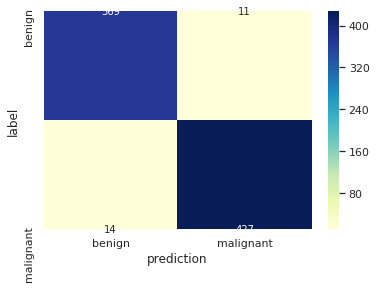

In [218]:
fig = plot_confusion_matrix_ensemble(train_fix_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-train-confusion-matrix.svg", bbox_inches = "tight")

In [219]:
pandas.DataFrame(calculate_confusion_matrix_stats(train_fix_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.969549,369,427,14,11,0.971053,0.968254,0.963446,0.974886,0.031746,0.028947,0.036554,0.969653,0.969652
1,0.969549,427,369,11,14,0.968254,0.971053,0.974886,0.963446,0.028947,0.031746,0.025114,0.969653,0.969652


## ROC Curve

No handles with labels found to put in legend.


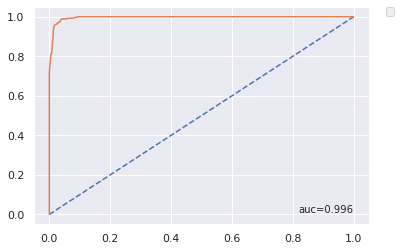

In [220]:
fig = plot_roc_curve(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

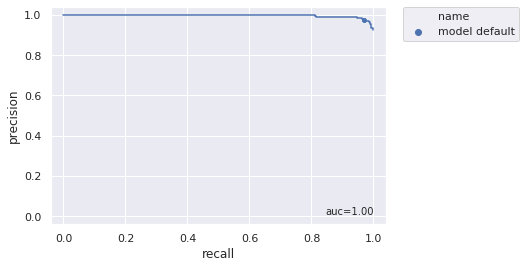

In [221]:
fig = plot_precision_recall(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-precisionrecall.svg", bbox_inches = "tight")

# Validation

In [222]:
model = best_model
predictions = model.predict(validation_set)
probabilities = model.predict_proba(validation_set)
pm.record("validation_labels", list(validation_labels))
pm.record("validation_probabilities", list(probabilities[:,1]))
pm.record("validation_predictions", list(predictions))

In [223]:
print("accuracy: {}".format(metrics.accuracy_score(validation_labels, predictions)))

accuracy: 0.9632352941176471


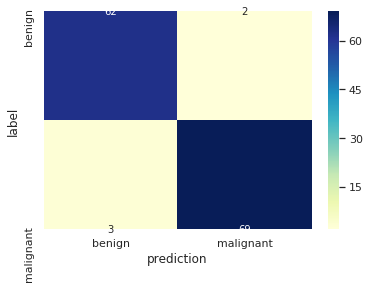

In [224]:
fig = plot_confusion_matrix_ensemble(validation_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-validation-confusion-matrix.svg", bbox_inches = "tight")

In [225]:
pandas.DataFrame(calculate_confusion_matrix_stats(validation_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.963235,62,69,3,2,0.968750,0.958333,0.953846,0.971831,0.041667,0.031250,0.046154,0.963542,0.963528
1,0.963235,69,62,2,3,0.958333,0.968750,0.971831,0.953846,0.031250,0.041667,0.028169,0.963542,0.963528


## ROC Curve

No handles with labels found to put in legend.


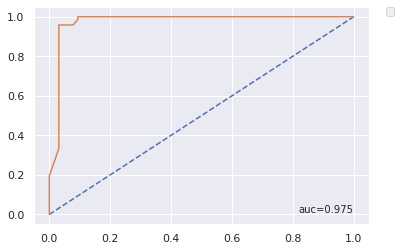

In [226]:
fig = plot_roc_curve(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

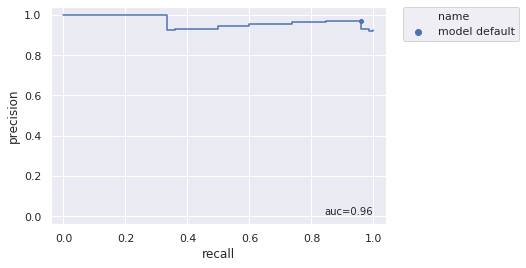

In [227]:
fig = plot_precision_recall(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-precisionrecall.svg", bbox_inches = "tight")

# Test

In [228]:
model = best_model
predictions = model.predict(test_set)
probabilities = model.predict_proba(test_set)
pm.record("test_labels", list(test_labels))
pm.record("test_probabilities", list(probabilities[:,1]))
pm.record("test_predictions", list(predictions))

In [229]:
print("accuracy: {}".format(metrics.accuracy_score(test_labels, predictions)))

accuracy: 0.7058823529411765


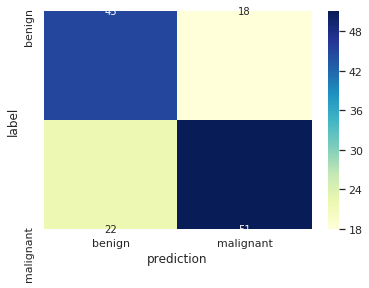

In [230]:
fig = plot_confusion_matrix_ensemble(test_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-test-confusion-matrix.svg", bbox_inches = "tight")

In [231]:
len(test_labels)

136

In [232]:
pandas.DataFrame(calculate_confusion_matrix_stats(test_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.705882,45,51,22,18,0.714286,0.698630,0.671642,0.739130,0.301370,0.285714,0.328358,0.706458,0.706415
1,0.705882,51,45,18,22,0.698630,0.714286,0.739130,0.671642,0.285714,0.301370,0.260870,0.706458,0.706415


## ROC Curve

No handles with labels found to put in legend.


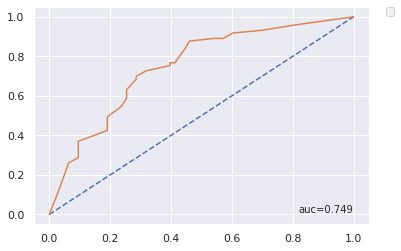

In [233]:
fig = plot_roc_curve(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

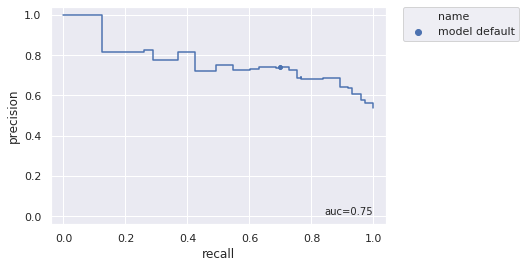

In [234]:
fig = plot_precision_recall(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-precisionrecall.svg", bbox_inches = "tight")

## Holdout

## ROC Curve

## Precision recall curve

In [235]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')